**Projet assurance auto Machine Learning - Pauline Mallet, Ana Lechaudel**

**Necessary imports**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

**Data import and analysis**

-------------------------- Data Head --------------------------------
   Driver Age  Driver Experience  Previous Accidents  \
0          56                 32                   4   
1          46                 19                   0   
2          32                 11                   4   
3          60                  0                   4   
4          25                  7                   0   

   Annual Mileage (x1000 km)  Car Manufacturing Year  Car Age  \
0                         17                    2002       23   
1                         21                    2025        0   
2                         15                    2020        5   
3                         19                    1991       34   
4                         13                    2005       20   

   Insurance Premium ($)  
0                 488.35  
1                 486.15  
2                 497.55  
3                 498.35  
4                 495.55  

------------------------- Data Info ---

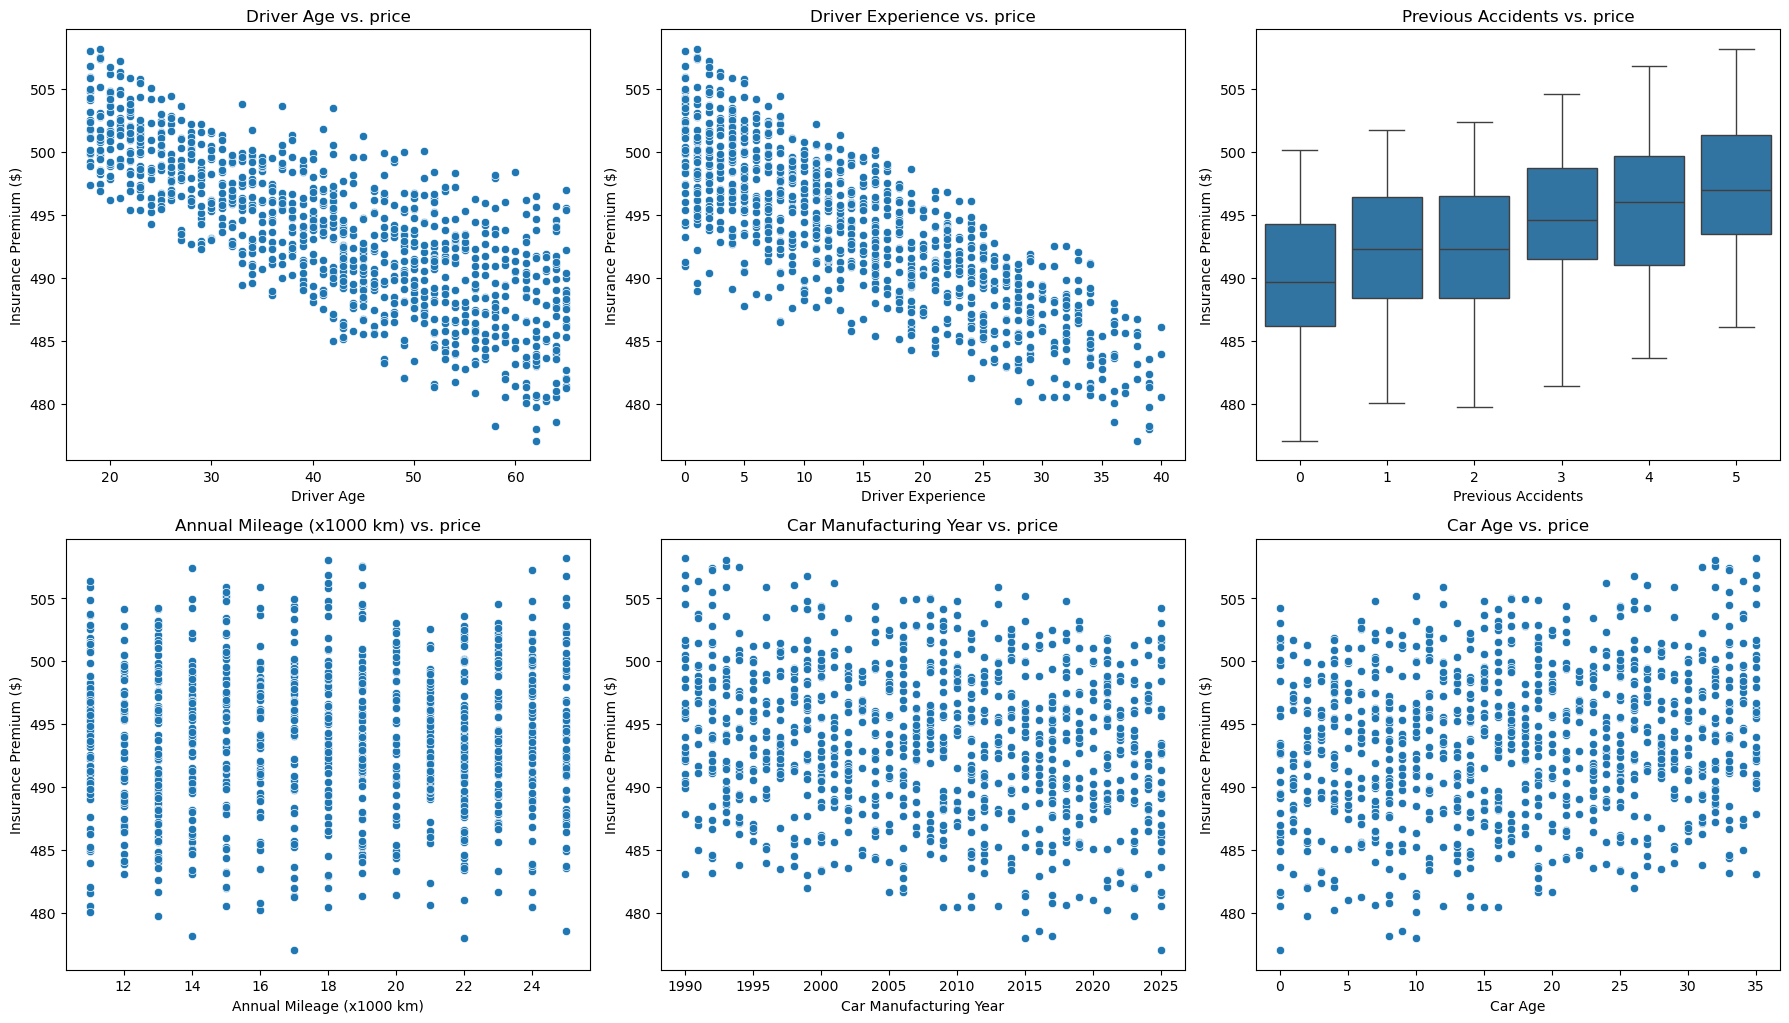


------------------------------------------- Correlation Matrix -----------------------------------------------------


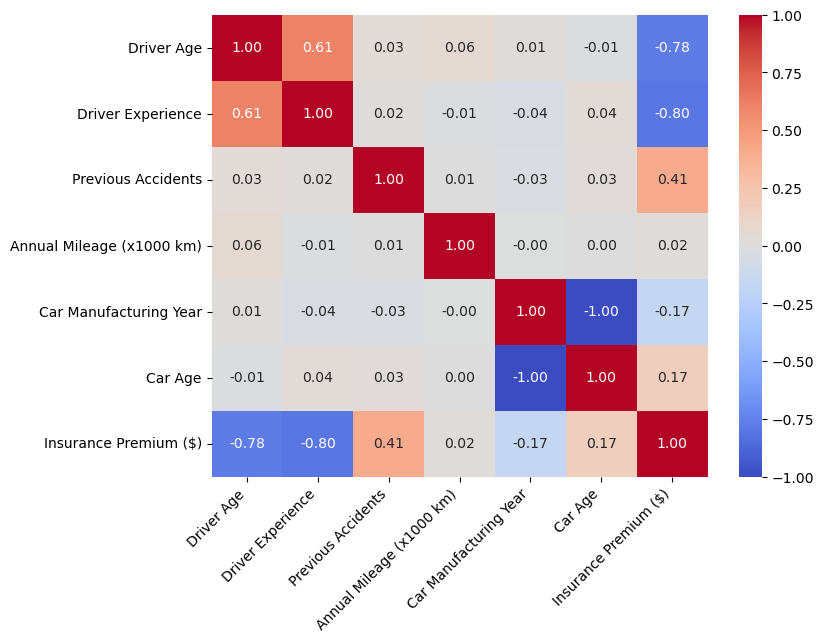

In [3]:
# We define the data, target, and explicative variables

data = pd.read_csv("car_data.csv")
target = 'Insurance Premium ($)'
features = data.drop(target, axis = 1).columns


print("-------------------------- Data Head --------------------------------")
print(data.head()) # First few lines of the dataset
print("\n------------------------- Data Info -------------------------------")
print(data.info()) # Information on the data's metrics and size
print("\n------------------------- Data Size -------------------------------")
print("Number of rows :", data.shape[0])
print("Number of columns :", data.shape[1])
print("\n---------------------- Data Description ---------------------------")
print(data.describe())

print("\n----------------------------------------- Correlation Analysis -------------------------------------------------------")

# We plot the relations between target and explicative variables with a boxplot and scatterplots
plt.figure(figsize = (18,15))

for i, feature in enumerate(features) : 
    plt.subplot(3,3, i+1)

    if feature not in ['Previous Accidents'] : 
        sns.scatterplot(x=data[feature], y = data[target])
        plt.title(f'{feature} vs. price')
        plt.xlabel(feature)
        plt.ylabel(target)
    else : 
        temp = data.copy()
        temp[feature] = temp[feature].astype('category')

        sns.boxplot(x=temp[feature], y = temp[target])
        plt.title(f'{feature} vs. price')
        plt.xlabel(feature)
        plt.ylabel(target)
        
plt.tight_layout()
plt.show()

print("\n------------------------------------------- Correlation Matrix -----------------------------------------------------")

correlation_matrix = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', cbar = True)
plt.xticks(rotation=45, ha='right') 
plt.show()

**What we must takeaway from the data analysis**

We can see in the diagrams that there are linear relationships between the price and : 
- The driver's age
- The driver's experience
- The number of previous accidents

The correlation matrix indeed shows the same with with the following correlation coefficients : 
- -0.78 for the driver's age which means the price is very correlated to the driver's age, the more a driver is old the lower the price.
- Likewhise -0.80 for the driver's experience.
- 0.41 for the number of previous accidents which means the more a driver has had accidents the higher the price will be.

**Data pre-processing**

In [4]:
print("----------------- Missing values check -------------------")
print(data.isnull().sum())

print("\n-----------------Checking for duplicates------------------")
initial = data.shape[0]
data.drop_duplicates(inplace = True)
final = data.shape[0]
print("Number of duplicates removed : ", initial - final)

# For the ourliers, the data's spread is very small and we would rather not lose information
# And we have no encoding to do because all the values are numerical

# Train test split
X = data.drop(target, axis = 1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)
print("\n------------------- Train test split size ----------------")
print("Train size : ", X_train.shape[0], "Test size : ", X_test.shape[0])

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

----------------- Missing values check -------------------
Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

-----------------Checking for duplicates------------------
Number of duplicates removed :  0

------------------- Train test split size ----------------
Train size :  800 Test size :  200


**What we must takeaway from the data preprocessing**

We have checked the data for missing values and duplicates and there were none. In addition, there are no categorical values to encode. Outliers were kept because the data spread is small and we did not want to lose information.

We have split and scaled the data into test and train sets to use in the model.

**First Model: Linear regression**

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)

print("\n---------------------------- Linear Regression Details ---------------------------------")
print("Intercept :", lin_reg.intercept_)
print("Coefficients :")
for feature, coef in zip(X_train.columns, lin_reg.coef_):
    print(f"  {feature}: {coef}")

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("--------------------------------- Metrics for the model ---------------------------------")
print("\nR2 =", r2_lin)
print("Mean Squared error =", mse_lin)

print("\n-------------------------Verification of r2 and MSE on training data---------------------")

y_pred_train_lin = lin_reg.predict(X_train_scaled)

mse_train_lin = mean_squared_error(y_train, y_pred_train_lin)
r2_train_lin = r2_score(y_train, y_pred_train_lin)

print("\nR2 =", r2_train_lin)
print("Mean Squared error =", mse_train_lin)


---------------------------- Linear Regression Details ---------------------------------
Intercept : 493.84824999999995
Coefficients :
  Driver Age: -2.7729320109768296
  Driver Experience: -3.205552643461028
  Previous Accidents: 2.5324691508486317
  Annual Mileage (x1000 km): 0.2182355020957868
  Car Manufacturing Year: -0.5127517331455359
  Car Age: 0.5127517331455366
--------------------------------- Metrics for the model ---------------------------------

R2 = 1.0
Mean Squared error = 2.601095285567138e-27

-------------------------Verification of r2 and MSE on training data---------------------

R2 = 1.0
Mean Squared error = 2.7101474171048905e-27


**What we must takeaway from the first model**

We can see in this model that the most important variables are the driver's experience, driver's age and the number of previous accidents as their coefficients are the highest in absolute value.
The first model has an r2 of 1 and a very small error which means it is perfect with this train and test set. 

However, this is rather suspicious and we must check if we are not overfitting. This is why we calculate the error and r2 for our training data as well and we can see we have very similar results. This means there is no proof of overfitting. 

This means that there is either a strong relationship in the dataset or one of the variables explains all of the price. 

**Second Model: Ridge**

After applying a linear regression to the data, we want to create a ridge model to improve our results. We will also do hyperparameter tuning on this model to find the best one.

In [6]:
ridge = Ridge(random_state = 30)

param_grid = { 'alpha' : [0.1, 1.0, 10.0, 100.0],
               'solver' : ['auto', 'svd', 'cholesky']}   # We define the parameters we are going to try for the model

grid_search = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'neg_mean_squared_error') # We will compare the models based on their mean squared error
grid_search.fit(X_train_scaled, y_train)

best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)


print("------------------------- Best ridge acording to the grid search -------------------------")
print("Parameters : ", grid_search.best_params_)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("--------------------------------- Metrics for the model ----------------------------------")
print("\nR2 =", r2_ridge)
print("Mean Squared error =", mse_ridge)

print("\n------------------------Verification of r2 and MSE on training data---------------------")

y_pred_train_ridge = best_ridge.predict(X_train_scaled)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("\nR2 =", r2_train_ridge)
print("Mean Squared error =", mse_train_ridge)

------------------------- Best ridge acording to the grid search -------------------------
Parameters :  {'alpha': 0.1, 'solver': 'svd'}
--------------------------------- Metrics for the model ----------------------------------

R2 = 0.9999999921561205
Mean Squared error = 2.3483813992957242e-07

------------------------Verification of r2 and MSE on training data---------------------

R2 = 0.9999999921608861
Mean Squared error = 2.827642132681465e-07


**What we must takeaway from the second model**

The second model has an r2 very close to 1 and a very small error which means it is close to perfect with this train and test set.

However, this is rather suspicious and we must check if we are not overfitting. This is why we calculate the error and r2 for our training data as well and we can see we have very similar results. This means there is no proof of overfitting.

This means that there is either a strong relationship in the dataset or one of the variables explains all of the price.

This model is slightly less powerful than the linear regression.

**Third model : Decision tree**

We want to change the style of prediction, here we will use a decision tree regressor to predict values

In [8]:
dt_reg = DecisionTreeRegressor(random_state = 30) # Creation of the model

dt_reg.fit(X_train_scaled, y_train)               # Fitting of the model

y_pred_dt = dt_reg.predict(X_test_scaled)         # Prediciton

# Evalutation

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

importances = pd.Series(dt_reg.feature_importances_, index=X_train.columns)


print("--------------------------------- Features for the model ----------------------------------")
print("\nDepth : ", dt_reg.get_depth())
print("Number of leaves : ", dt_reg.get_n_leaves())
print("Importance of the variables : \n", importances)

print("--------------------------------- Metrics for the model ----------------------------------")
print("\nR2 =", r2_dt)
print("Mean Squared error =", mse_dt)

print("\n------------------------Verification of r2 and MSE on training data---------------------")

y_pred_train_dt = dt_reg.predict(X_train_scaled)

mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
print("\nR2 =", r2_train_dt)
print("Mean Squared error =", mse_train_dt)

--------------------------------- Features for the model ----------------------------------

Depth :  16
Number of leaves :  783
Importance of the variables : 
 Driver Age                   0.245696
Driver Experience            0.555617
Previous Accidents           0.159284
Annual Mileage (x1000 km)    0.003810
Car Manufacturing Year       0.017011
Car Age                      0.018581
dtype: float64
--------------------------------- Metrics for the model ----------------------------------

R2 = 0.9326042781643197
Mean Squared error = 1.4204796725050295

------------------------Verification of r2 and MSE on training data---------------------

R2 = 1.0
Mean Squared error = 0.0


**What we must takeaway from the third model**

The third model has an r2 very close to 1 but the error is more important than in other models. In addition, it shows signs of overfitting given its results on the training set. 

Hence, this model is the least effective so far.

**Fourth model : Gradient Boosting with hyperparameter tuning**

In [23]:
gbr = GradientBoostingRegressor(random_state = 33)

param_grid_gbr = {
    'n_estimators' : [100, 200],
    'learning_rate' : [0.05, 0.1],
    'max_depth' : [3,5]
}

grid_search_gbr = GridSearchCV(
    estimator = gbr, 
    param_grid = param_grid_gbr,
    scoring = 'neg_mean_squared_error',
    cv = 3,
    verbose = 0,
    n_jobs = -1
)

grid_search_gbr.fit(X_train_scaled, y_train)

best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test_scaled)

print("------------------------- Best GBR acording to the grid search -------------------------")
print("Parameters : ", grid_search_gbr.best_params_)


mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)


print("\n--------------------------------- Metrics for the model ----------------------------------")
print("\nR2 =", r2_gbr)
print("Mean Squared error =", mse_gbr)

print("\n------------------------Verification of r2 and MSE on training data---------------------")

y_pred_train_gbr = best_gbr.predict(X_train_scaled)

mse_train_gbr = mean_squared_error(y_train, y_pred_train_gbr)
r2_train_gbr = r2_score(y_train, y_pred_train_gbr)
print("\nR2 =", r2_train_gbr)
print("Mean Squared error =", mse_train_gbr)

------------------------- Best GBR acording to the grid search -------------------------
Parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

--------------------------------- Metrics for the model ----------------------------------

R2 = 0.9946845396308238
Mean Squared error = 0.15913972446663144

------------------------Verification of r2 and MSE on training data---------------------

R2 = 0.9987020405943587
Mean Squared error = 0.04681861673567022


**What we must takeaway from the second model**

The last model has an r2 very close to 1 and a small error but compared to previous models, it is not as good at prediction..

It does not show signs of overfitting because the testing and training set have very similar results.

**Comparing the models**

Based on previous codes, we can now select the best model for our data.

In [24]:
print('--------------------------- Final evaluation -----------------------------------')

print("\nLinear regression results : ")
print("R2 score : ", r2_lin)
print("Mean squared error : " , mse_lin)

print("\nRidge results : ")
print("R2 score : " , r2_ridge)
print("Mean squared error : " , mse_ridge)

print("\nDecision tree regressor results : ")
print("R2 score : " , r2_ridge)
print("Mean squared error : " , mse_dt)

print("\nGBR results :")
print("R2 score : " , r2_gbr)
print("Mean squared error : " , mse_gbr)

--------------------------- Final evaluation -----------------------------------

Linear regression results : 
R2 score :  1.0
Mean squared error :  2.601095285567138e-27

Ridge results : 
R2 score :  0.9999999921561205
Mean squared error :  2.3483813992957242e-07

Decision tree regressor results : 
R2 score :  0.9999999921561205
Mean squared error :  1.4204796725050295

GBR results :
R2 score :  0.9946845396308238
Mean squared error :  0.15913972446663144


**Conclusion**

In conclusion, the best model is the linear regression because it has the highest r2 and the lowest error. We have checked for signs of overfitting and there are none.